# 1.scrape and load metadata

In [1]:
import selenium
from selenium import webdriver
import time

In [2]:
selenium.__version__

'3.141.0'

In [3]:
## scrape 'columns in this dataset' table
url = "https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8"
driver_path = "chromedriver-linux64/chromedriver"
driver = webdriver.Chrome(executable_path=driver_path)
driver.get(url)
time.sleep(10)
show_more = driver.find_element_by_xpath('//*[@id="app"]/div/div[1]/div/div/div[2]/div[1]/div/button[1]')
show_more.click()
butt = driver.find_element_by_xpath('//*[@id="app"]/div/div[2]/section[2]/div/div[2]/a[1]')
butt.click()
# about data 
about = driver.find_element_by_xpath('//*[@id="app"]/div/div[1]/div/div/div[2]/div[1]/div/div[1]/div')
# column info table
table = driver.find_elements_by_css_selector('.schema-preview div div table tbody tr')
# save scraped data in a text file:
with open("metadata.txt", "a") as f:
    f.write(f"{about.text}\n\n")
    for idx in range(0, len(table) ,2):
        text = table[idx].text.split("\n")
        key, val = text[0], text[1]
        f.write(f"{key} : {val}\n" )
driver.close()

In [6]:
# load scraped file
with open("metadata.txt") as f:
    for line in f.readlines():
        print(line)

This dataset reflects incidents of crime in the City of Los Angeles dating back to 2020. This data is transcribed from original crime reports that are typed on paper and therefore there may be some inaccuracies within the data. Some location fields with missing data are noted as (0°, 0°). Address fields are only provided to the nearest hundred block in order to maintain privacy. This data is as accurate as the data in the database. Please note questions or concerns in the comments.



DR_NO : Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits

Date Rptd : MM/DD/YYYY

DATE OCC : MM/DD/YYYY

TIME OCC : In 24 hour military time.

AREA : The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.

AREA NAME : The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it

# 2. Loading data 

In [7]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)

In [8]:
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")
df.shape

(761582, 28)

In [9]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [10]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761582 entries, 0 to 761581
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           761582 non-null  int64  
 1   Date Rptd       761582 non-null  object 
 2   DATE OCC        761582 non-null  object 
 3   TIME OCC        761582 non-null  int64  
 4   AREA            761582 non-null  int64  
 5   AREA NAME       761582 non-null  object 
 6   Rpt Dist No     761582 non-null  int64  
 7   Part 1-2        761582 non-null  int64  
 8   Crm Cd          761582 non-null  int64  
 9   Crm Cd Desc     761582 non-null  object 
 10  Mocodes         657013 non-null  object 
 11  Vict Age        761582 non-null  int64  
 12  Vict Sex        662009 non-null  object 
 13  Vict Descent    662003 non-null  object 
 14  Premis Cd       761573 non-null  float64
 15  Premis Desc     761138 non-null  object 
 16  Weapon Used Cd  264752 non-null  float64
 17  Weapon Des

# 3. data wrangling

In [11]:
#Renaming columns
new_cols = ["case_id","date_rpdt", "date_occ", "time_occ", "area", "area_name", "sub_area_code", "crime_class", 
           "crime_code", "crime_dsp", "suspect_mo_code", "vict_age", "vict_sex", "vict_descent", 
           "permis_code", "permis_dsp", "weapon_code", "weapon_dsp", "case_status", "case_status_dsp",
           "crime_cd1", "crime_cd2", "crime_cd3", "crime_cd4", "location", "street", "lat", "lng"]
df.columns = new_cols

In [12]:
df.sample(n=15)

,case_id,date_rpdt,date_occ,time_occ,area,area_name,sub_area_code,crime_class,crime_code,crime_dsp,suspect_mo_code,vict_age,vict_sex,vict_descent,permis_code,permis_dsp,weapon_code,weapon_dsp,case_status,case_status_dsp,crime_cd1,crime_cd2,crime_cd3,crime_cd4,location,street,lat,lng
470568,220317842,10/03/2022 12:00:00 AM,10/03/2022 12:00:00 AM,900,3,Southwest,363,2,354,THEFT OF IDENTITY,1822 0100 0922,31,F,O,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,4000 WEST BL,NaN,34.0128,-118.3447
730326,231812555,06/23/2023 12:00:00 AM,06/23/2023 12:00:00 AM,115,18,Southeast,1822,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344 0345 1822,27,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,341.0,NaN,NaN,NaN,S BROADWAY,W 102ND ST,33.9437,-118.2784
627900,221401227,10/17/2022 12:00:00 AM,10/17/2022 12:00:00 AM,1520,14,Pacific,1414,1,310,BURGLARY,1607 2004 0344,0,X,X,210.0,RESTAURANT/FAST FOOD,NaN,NaN,AA,Adult Arrest,310.0,NaN,NaN,NaN,400 LINCOLN BL,NaN,33.9976,-118.4670
26388,200107839,02/25/2020 12:00:00 AM,02/22/2020 12:00:00 AM,2030,1,Central,171,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0377 1822 2032 0344,24,F,B,210.0,RESTAURANT/FAST FOOD,NaN,NaN,IC,Invest Cont,440.0,NaN,NaN,NaN,800 W OLYMPIC BL,NaN,34.0450,-118.2640
593981,220111308,04/28/2022 12:00:00 AM,04/27/2022 12:00:00 AM,1900,1,Central,162,1,330,BURGLARY FROM VEHICLE,1609 0344 1307 1822 0329,31,F,H,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,800 S OLIVE ST,NaN,34.0452,-118.2569
211722,210111433,06/06/2021 12:00:00 AM,05/24/2021 12:00:00 AM,2330,1,Central,192,1,330,BURGLARY FROM VEHICLE,1609 1822 1307 0344 0329,53,F,H,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,1400 S HOPE ST,NaN,34.0381,-118.2666
343176,210914746,10/01/2021 12:00:00 AM,09/30/2021 12:00:00 AM,1515,9,Van Nuys,906,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,0429 2000 1813 0444,19,F,H,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,7300 LENNOX AV,NaN,34.2030,-118.4458
390132,210317808,10/22/2021 12:00:00 AM,10/21/2021 12:00:00 AM,1730,3,Southwest,351,1,440,THEFT PLAIN - PETTY ($950 & UNDER),1822 0344 2032,40,F,H,402.0,MARKET,NaN,NaN,IC,Invest Cont,440.0,NaN,NaN,NaN,3400 S LA BREA AV,NaN,34.0218,-118.3556
28388,200911898,07/03/2020 12:00:00 AM,07/02/2020 12:00:00 AM,1700,9,Van Nuys,994,1,310,BURGLARY,1607 0344 0358 1414,35,M,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,13400 INWOOD DR,NaN,34.1395,-118.4247
95881,200607154,02/26/2020 12:00:00 AM,02/26/2020 12:00:00 AM,1422,6,Hollywood,666,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344 2032,26,M,W,252.0,"COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, E...",NaN,NaN,IC,Invest Cont,341.0,NaN,NaN,NaN,VINE,SUNSET,34.0980,-118.3267


In [13]:
# check for duplicate
df["case_id"].astype("object").describe()

count       761582
unique      761582
top       10304468
freq             1
Name: case_id, dtype: int64

In [14]:
# delete case_id column
df.drop("case_id", axis=1, inplace=True)

In [15]:
# date_rpdt type is object, so we need convert its type to datetime
df["date_rpdt"] = pd.to_datetime(df["date_rpdt"])
df.head()

,date_rpdt,date_occ,time_occ,area,area_name,sub_area_code,crime_class,crime_code,crime_dsp,suspect_mo_code,vict_age,vict_sex,vict_descent,permis_code,permis_dsp,weapon_code,weapon_dsp,case_status,case_status_dsp,crime_cd1,crime_cd2,crime_cd3,crime_cd4,location,street,lat,lng
0,2020-01-08,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,2020-01-02,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,2020-04-14,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,2020-01-01,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,2020-01-01,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [16]:
df["date_rpdt"].describe()

/tmp/ipykernel_3919/2246734180.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df["date_rpdt"].describe()


count                  761582
unique                   1294
top       2023-02-03 00:00:00
freq                      923
first     2020-01-01 00:00:00
last      2023-07-17 00:00:00
Name: date_rpdt, dtype: object

In [17]:
# next we need to merge "date_occ" and "time_occ" into one columns with dtype datetime but first we need to convert time_occ to regular time 

# convert military time to string regular time

def convert_to_regular_time(val):
    val = f"{val:04}"
    val = val[:2] + ':' + val[2:]
    return val


df["time_occ"] = df["time_occ"].apply(convert_to_regular_time)

In [18]:
# update date_occ column  to hold just the date
def trunc(s):
    return s[0:10]


df["date_occ"] = df["date_occ"].apply(trunc)

In [19]:
# create a new column  by merging "data_occ" and "time_occ"
for idx in range(len(df)):
    df.loc[idx, "merged_col"] = str(df.loc[idx, "date_occ"]) +" "+ f'{df.loc[idx, "time_occ"]:04}'


In [20]:
# convert the new column's type to datetime
df["merged_col"] = pd.to_datetime(df["merged_col"])
# delete "date_occ" and "time_occ" columns
df.drop("date_occ", axis=1, inplace=True)
df.drop("time_occ", axis=1, inplace=True)
# rename created column 
df.rename(columns={"merged_col": "time_occ"}, inplace=True)
# set "time_occ as first column"
l = list(df.columns)
l = l[:len(l)-1]
l = ["time_occ"] + l
df = df.reindex(columns=l)

In [21]:
# area column
df.area.describe()

count    761582.000000
mean         10.718934
std           6.092570
min           1.000000
25%           6.000000
50%          11.000000
75%          16.000000
max          21.000000
Name: area, dtype: float64

In [22]:
df.area.astype("object").describe()

count     761582
unique        21
top            1
freq       51114
Name: area, dtype: int64

In [23]:
# area_name
df.area_name.describe()

count      761582
unique         21
top       Central
freq        51114
Name: area_name, dtype: object

In [24]:
# since 'area' and 'area_name' represent the same information we need to check for mismatch
for val in range(1, 22):
    data = df[df["area"] == val]
    print(f"for area code: {val}")
    print(data["area_name"].value_counts)
    print("\n\n")

for area code: 1
<bound method IndexOpsMixin.value_counts of 1         Central
2         Central
5         Central
6         Central
7         Central
           ...   
761503    Central
761506    Central
761509    Central
761538    Central
761580    Central
Name: area_name, Length: 51114, dtype: object>



for area code: 2
<bound method IndexOpsMixin.value_counts of 47        Rampart
290       Rampart
329       Rampart
360       Rampart
414       Rampart
           ...   
761468    Rampart
761481    Rampart
761488    Rampart
761511    Rampart
761545    Rampart
Name: area_name, Length: 35380, dtype: object>



for area code: 3
<bound method IndexOpsMixin.value_counts of 0         Southwest
65        Southwest
134       Southwest
135       Southwest
186       Southwest
            ...    
761482    Southwest
761510    Southwest
761516    Southwest
761533    Southwest
761546    Southwest
Name: area_name, Length: 42544, dtype: object>



for area code: 4
<bound method IndexOpsMixin.value_

In [25]:
# no issue found we can delete one of them and since this wrangling is intended for visualization  i will keep area name because it is more informative
df.drop('area', axis=1, inplace=True)

In [26]:
# "sub_area_code" column
df.sub_area_code.describe()

count    761582.000000
mean       1118.307782
std         609.264668
min         101.000000
25%         622.000000
50%        1142.000000
75%        1618.000000
max        2199.000000
Name: sub_area_code, dtype: float64

In [27]:
df.sub_area_code.astype("object").describe()

count     761582
unique      1199
top          162
freq        4074
Name: sub_area_code, dtype: int64

In [28]:
# "crime_class" column
df.crime_class.astype("object").describe()

count     761582
unique         2
top            1
freq      445136
Name: crime_class, dtype: int64

In [29]:
# "crime_code" column
df.crime_code.describe()

count    761582.000000
mean        500.841395
std         207.943836
min         110.000000
25%         331.000000
50%         442.000000
75%         626.000000
max         956.000000
Name: crime_code, dtype: float64

In [30]:
df.crime_code.astype("object").describe()

count     761582
unique       138
top          510
freq       81426
Name: crime_code, dtype: int64

In [31]:
# "crime_dsp"
df.crime_dsp.describe()

count               761582
unique                 138
top       VEHICLE - STOLEN
freq                 81426
Name: crime_dsp, dtype: object

In [32]:
# "suspect_mo_code" column
df.suspect_mo_code.describe()

count     657013
unique    256088
top         0344
freq       31482
Name: suspect_mo_code, dtype: object

In [34]:
# first page of mo_code
import PyPDF2
  
with open('mo_suspect_code.pdf', 'rb') as f:
    # creating a pdf reader object
    pdf_reader = PyPDF2.PdfReader(f)
    # creating a page object
    page_obj = pdf_reader.pages[0]
    # extracting text from page
    print(page_obj.extract_text())

REV: 07/19
0100 Suspect Impersonate
0101 Aid victim
0102 Blind
0103 Physically disabled
0104 Customer
0105 Delivery
0106 Doctor
0107 God
0108 Infirm
0109 Inspector
0110 Involved in traffic/accident
0112 Police
0113 Renting
0114 Repair Person
0115 Returning stolen property
0116 Satan
0117 Salesman
0118 Seeking someone
0119 Sent by owner
0120 Social Security/Medicare
0121 DWP/Gas Company/Utility worker
0122 Contractor
0123 Gardener/Tree Trimmer
0200 Suspect wore disguise
0201 Bag
0202 Cap/hat
0203 Cloth (with eyeholes)
0204 Clothes of opposite sex
0205 Earring
0206 Gloves
0207 Handkerchief
0208 Halloween mask
0209 Mask
0210 Make up (males only)
0211 Shoes
0212 Nude/partly nude
0213 Ski mask
0214 Stocking
0215 Unusual clothes
0216 Suspect wore hood/hoodie
0217 Uniform
0218 Wig
0219 Mustache-Fake
0220 Suspect wore motorcycle helmetMO CODES
NUMERICAL
1 of 19


In [35]:
# the column dtype is object which is weired because from the pdf we see the code are integer so let's check for value's type 
# list unique type in the columns
df.suspect_mo_code.apply(type).unique()

array([<class 'str'>, <class 'float'>], dtype=object)

In [36]:
# some values are float64 and some are string
# count values of each type
df.suspect_mo_code.apply(type).value_counts()

<class 'str'>      657013
<class 'float'>    104569
Name: suspect_mo_code, dtype: int64

In [39]:
# check some random values
df.suspect_mo_code.sample(n=15)

348491                              NaN
264932         2000 0913 1814 0416 0432
479336         1218 1266 1822 0334 1402
150526                             0100
15287                    0416 0408 0444
356947                             1501
535132         0319 1266 0601 0913 2033
126875              1822 0100 0930 0935
130930                              NaN
613823    2000 0913 1813 0444 0400 0329
505064                        0344 0385
72840                         0344 1822
604501                              NaN
745587                   0913 1814 0329
553558                        0930 1822
Name: suspect_mo_code, dtype: object

In [37]:
# it appears that some suspect are associated with more than one code 
# check the maximum number of code associated with a suspect
l = []
for val in df.suspect_mo_code.values:
    val = str(val)
    val = val.split()
    l.append(len(val))
max(l)

10

#### recap:
- **104,569** missings values
- some suspects have up to 10 mo_code associated with, so splitting the column woudn't be a good idea
#### For now i will fill nan with '0000'  to indicate No Activities Associated 

In [38]:
df["suspect_mo_code"].replace("nan", "0000", inplace=True)

In [39]:
# "vict_age" col
df.vict_age.describe()

count    761582.000000
mean         29.908199
std          21.736128
min          -3.000000
25%          11.000000
50%          31.000000
75%          45.000000
max         120.000000
Name: vict_age, dtype: float64

In [43]:
df.vict_age.astype("object").describe()

count     761582
unique       103
top            0
freq      186028
Name: vict_age, dtype: int64

<Axes: xlabel='vict_age', ylabel='count'>

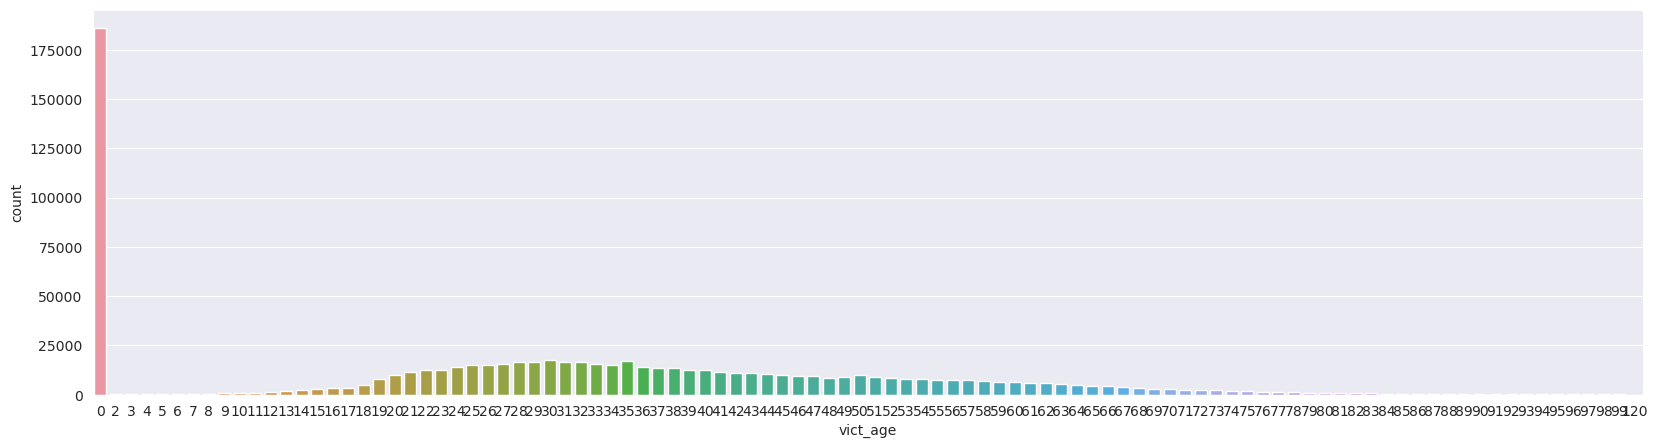

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(data=df, x="vict_age", ax=ax)

In [40]:
# some negative age and 186028 rows with 0 as age 
# we will assume zero means age not available
# replace negative  values with 0
df["vict_age"].replace([-3, -2, -1], 0, inplace=True)

<Axes: >

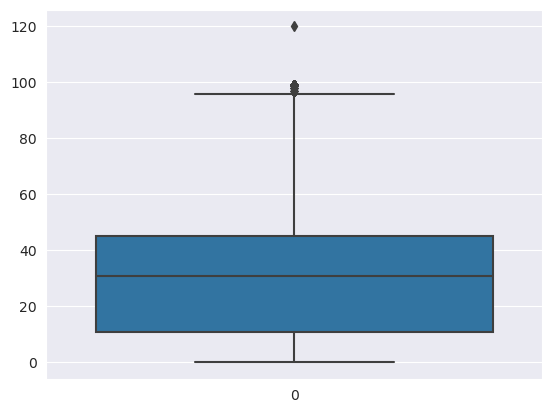

In [43]:
# victim Age distibution
sns.boxplot(data=df.vict_age)

In [44]:
# "vict_sex" col
df.vict_sex.describe()

count     662009
unique         5
top            M
freq      315399
Name: vict_sex, dtype: object

In [48]:
df["vict_sex"].value_counts()

M    315399
F    281376
X     65145
H        88
-         1
Name: vict_sex, dtype: int64

<Axes: xlabel='vict_sex', ylabel='count'>

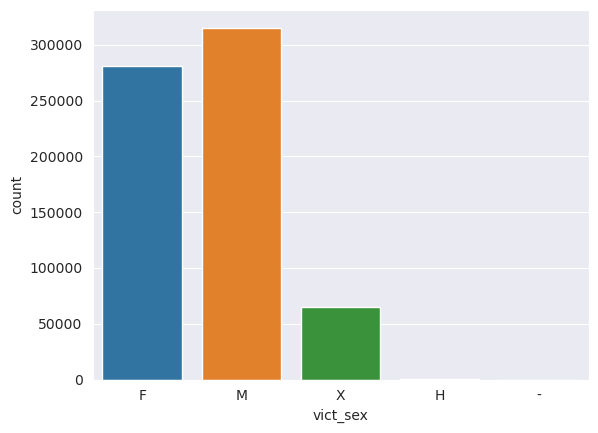

In [45]:
sns.countplot(data=df, x="vict_sex")

In [46]:
# since "H" is not a universal code for gender 
# replace "H" , "-" and np.nan with "X" for unspecified
df["vict_sex"] = df["vict_sex"].replace(["H", "-", np.nan], "X")
df["vict_sex"].value_counts()

M    315399
F    281376
X    164807
Name: vict_sex, dtype: int64

In [47]:
# "vict_descent" col
df["vict_descent"].describe()

count     662003
unique        20
top            H
freq      233935
Name: vict_descent, dtype: object

In [52]:
df.vict_descent.value_counts()

H    233935
W    156128
B    109245
X     72183
O     60284
A     16635
K      4053
F      3174
C      2864
J      1070
V       771
I       730
Z       370
P       207
U       157
D        53
G        51
L        47
S        44
-         2
Name: vict_descent, dtype: int64

In [48]:
# replace "-" and np.nan with "X" for unknown 
df["vict_descent"] = df["vict_descent"].replace(["-", np.nan], "X")

<Axes: xlabel='vict_descent', ylabel='count'>

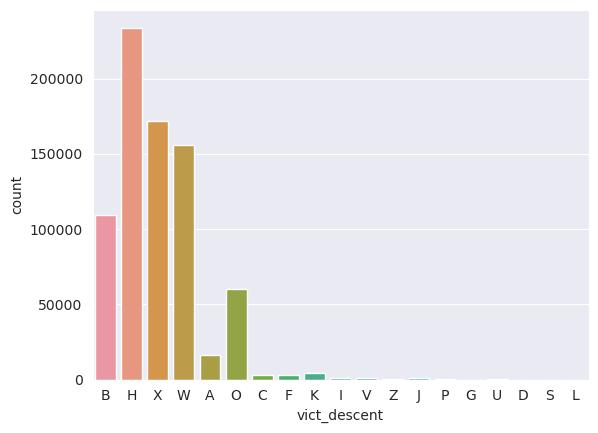

In [49]:
sns.countplot(data=df, x="vict_descent")

In [50]:
# Premis Cd : The type of structure, vehicle, or location where the crime took place.
# "permis_code"
df.permis_code.describe()


count    761573.000000
mean        305.904869
std         216.767951
min         101.000000
25%         101.000000
50%         203.000000
75%         501.000000
max         974.000000
Name: permis_code, dtype: float64

In [51]:
df.permis_code.astype("object").describe()

count     761573.0
unique       312.0
top          101.0
freq      191718.0
Name: permis_code, dtype: float64

In [52]:
# 9 missing values
df[df["permis_code"].isna()]

,time_occ,date_rpdt,area_name,sub_area_code,crime_class,crime_code,crime_dsp,suspect_mo_code,vict_age,vict_sex,vict_descent,permis_code,permis_dsp,weapon_code,weapon_dsp,case_status,case_status_dsp,crime_cd1,crime_cd2,crime_cd3,crime_cd4,location,street,lat,lng
42941,2020-03-16 14:00:00,2020-03-16,Hollywood,647,1,510,VEHICLE - STOLEN,NaN,0,X,X,NaN,NaN,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,SUNSET BL,GOWER,34.0980,-118.3223
115945,2020-10-20 20:00:00,2020-10-21,Mission,1966,1,510,VEHICLE - STOLEN,NaN,0,X,X,NaN,NaN,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,9400 VAN NUYS BL,NaN,34.2410,-118.4502
341068,2021-12-22 04:30:00,2021-12-22,Hollenbeck,418,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,0,X,X,NaN,NaN,NaN,NaN,IC,Invest Cont,420.0,NaN,NaN,NaN,3900 VAN HORNE AV,NaN,34.0948,-118.1751
379788,2021-03-27 12:00:00,2021-03-27,Wilshire,759,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,0,X,X,NaN,NaN,NaN,NaN,IC,Invest Cont,420.0,NaN,NaN,NaN,1200 WESTCHESTER PL,NaN,34.0472,-118.3189
385928,2021-01-11 14:00:00,2021-01-12,Pacific,1428,2,946,OTHER MISCELLANEOUS CRIME,NaN,0,X,X,NaN,NaN,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,3200 OVERLAND AV,NaN,34.0265,-118.4184
501810,2022-10-26 21:00:00,2022-10-27,Foothill,1651,1,520,VEHICLE - ATTEMPT STOLEN,NaN,0,X,X,NaN,NaN,NaN,NaN,IC,Invest Cont,520.0,NaN,NaN,NaN,9800 LAUREL CANYON BL,NaN,34.2482,-118.4209
507044,2022-01-02 14:30:00,2022-01-02,Newton,1395,1,520,VEHICLE - ATTEMPT STOLEN,NaN,0,X,X,NaN,NaN,NaN,NaN,IC,Invest Cont,520.0,NaN,NaN,NaN,400 E 68TH ST,NaN,33.9779,-118.2681
539376,2022-09-30 17:00:00,2022-09-30,Southeast,1871,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,0,X,X,NaN,NaN,NaN,NaN,IC,Invest Cont,420.0,NaN,NaN,NaN,14900 S MENLO AV,NaN,33.8964,-118.2892
644097,2023-05-09 18:25:00,2023-05-10,Northeast,1177,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,0,X,X,NaN,NaN,NaN,NaN,IC,Invest Cont,420.0,NaN,NaN,NaN,2200 N FIGUEROA ST,NaN,34.0884,-118.2258


In [53]:
df["permis_code"].isna().sum()

9

In [54]:
# "permis_dsp"
df["permis_dsp"].describe()

count     761138
unique       306
top       STREET
freq      191718
Name: permis_dsp, dtype: object

In [59]:
# 444 missing values
df["permis_dsp"].isna().sum()


444

In [60]:
# since there is no document explaining permis_code we replace nan with "no_description"
df["permis_dsp"].replace(np.nan, "no description", inplace=True)

In [61]:
# we can delete 'permis_code' column
df.drop('permis_code', axis=1, inplace=True)

0

In [62]:
# "weapon_code"
df["weapon_code"].describe()

count    264752.000000
mean        362.598054
std         123.743438
min         101.000000
25%         309.000000
50%         400.000000
75%         400.000000
max         516.000000
Name: weapon_code, dtype: float64

In [63]:
df["weapon_code"].isna().sum()

496830

In [64]:
# "weapon_dsp"
df["weapon_dsp"].describe()

count                                             264752
unique                                                79
top       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
freq                                              142191
Name: weapon_dsp, dtype: object

In [65]:
df["weapon_dsp"].isna().sum()

496830

In [66]:
# replace nan with "no weapon"
df["weapon_dsp"].replace(np.nan, "no_weapon", inplace=True)
df["weapon_dsp"].isna().sum()
# delete 'weapon_code' column
df.drop('weapon_code', axis=1, inplace=True)

In [67]:
# "case_status"
df["case_status"].describe()


count     761582
unique         6
top           IC
freq      609421
Name: case_status, dtype: object

In [68]:
# no missing values
df["case_status"].value_counts()

IC    609421
AO     81958
AA     66510
JA      2407
JO      1283
CC         3
Name: case_status, dtype: int64

In [69]:
# "case_status_dsp"
df["case_status_dsp"].describe()

count          761582
unique              6
top       Invest Cont
freq           609421
Name: case_status_dsp, dtype: object

In [70]:
df["case_status_dsp"].value_counts()

Invest Cont     609421
Adult Other      81958
Adult Arrest     66510
Juv Arrest        2407
Juv Other         1283
UNK                  3
Name: case_status_dsp, dtype: int64

In [71]:
# both "case" column represent the same piece of information  
# remove "case_status" and rename "case_status_dsp" to "case_status"
df.drop("case_status", axis=1, inplace=True)
df.rename(columns={"case_status_dsp": "case_status"}, inplace=True)

In [72]:
df.columns

Index(['time_occ', 'date_rpdt', 'area_name', 'sub_area_code', 'crime_class',
       'crime_code', 'crime_dsp', 'suspect_mo_code', 'vict_age', 'vict_sex',
       'vict_descent', 'permis_dsp', 'weapon_dsp', 'case_status', 'crime_cd1',
       'crime_cd2', 'crime_cd3', 'crime_cd4', 'location', 'street', 'lat',
       'lng'],
      dtype='object')

In [73]:
# "crime_cd1"
df["crime_cd1"].astype("object").describe()

count     761572.0
unique       140.0
top          510.0
freq       81417.0
Name: crime_cd1, dtype: float64

In [74]:
# "crime_cd1" is just a replication of crime_code so we drop it
df.drop("crime_cd1", axis=1, inplace=True)

In [75]:
# "crime_cd2"
df.crime_cd2.describe()

count    56342.000000
mean       957.394981
std        111.691334
min        210.000000
25%        998.000000
50%        998.000000
75%        998.000000
max        999.000000
Name: crime_cd2, dtype: float64

In [76]:
# "crime_cd3"
df.crime_cd3.describe()

count    1875.00000
mean      983.60480
std        51.45529
min       434.00000
25%       998.00000
50%       998.00000
75%       998.00000
max       999.00000
Name: crime_cd3, dtype: float64

In [77]:
# "crime_cd4"
df.crime_cd4.describe()

count     57.000000
mean     990.368421
std       28.594225
min      821.000000
25%      998.000000
50%      998.000000
75%      998.000000
max      999.000000
Name: crime_cd4, dtype: float64

In [78]:
# for crime_(cd2, cd3, cd4) replace np.nan with 0 for no_additional_crime
df["crime_cd2"].replace(np.nan, 0, inplace=True)
df["crime_cd3"].replace(np.nan, 0, inplace=True)
df["crime_cd4"].replace(np.nan, 0, inplace=True)

In [79]:
# "location"
df.location.describe()
# no missing values

count                                     761582
unique                                     62698
top       800 N  ALAMEDA                      ST
freq                                        1403
Name: location, dtype: object

In [80]:
# "street"
df.street.describe()

count       122391
unique        9437
top       BROADWAY
freq          2003
Name: street, dtype: object

In [81]:
# 639.191 missing values 
# drop col
df.drop("street", axis=1, inplace=True)

In [82]:
# lat
df["lat"].describe()

count    761582.000000
mean         33.972143
std           1.859163
min           0.000000
25%          34.013300
50%          34.058400
75%          34.163100
max          34.334300
Name: lat, dtype: float64

/tmp/ipykernel_3919/3297663245.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["lat"], color="g", bins=40, hist_kws={'alpha': 0.5})


<Axes: xlabel='lat', ylabel='Density'>

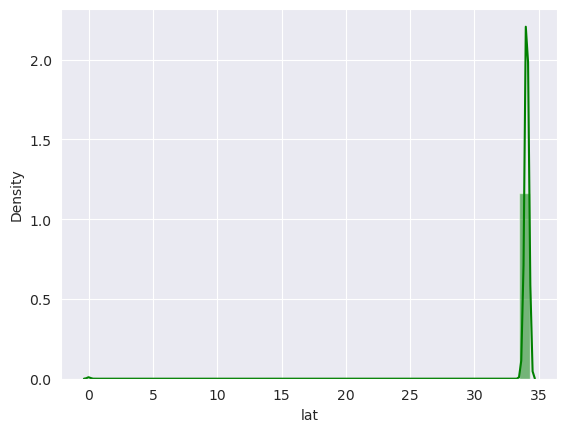

In [83]:
sns.distplot(df["lat"], color="g", bins=40, hist_kws={'alpha': 0.5})

by a quick googling we find :
- The latitude range of Los Angeles is between 34.03° North and 34.07° North.
- The longitude range is between -118.25° West and -118.15° West. 

In [85]:
df[df["lat"] < 34.03]["lat"].shape

(238201,)

##### over 200.000 wrong values,for now I will  skip it 

In [86]:
# lng
df["lng"].describe()

count    761582.000000
mean       -118.001893
std           6.447103
min        -118.667600
25%        -118.429600
50%        -118.321400
75%        -118.273900
max           0.000000
Name: lng, dtype: float64

In [87]:
# check for the number of record with error longitude
df[df["lng"] > -118.15]["lat"].shape

(2266,)

##### same case as previous but with far more less wrong values

## Reduce memory usage by choosing the appropiate type for columns

In [88]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761582 entries, 0 to 761581
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   time_occ         761582 non-null  datetime64[ns]
 1   date_rpdt        761582 non-null  datetime64[ns]
 2   area_name        761582 non-null  object        
 3   sub_area_code    761582 non-null  int64         
 4   crime_class      761582 non-null  int64         
 5   crime_code       761582 non-null  int64         
 6   crime_dsp        761582 non-null  object        
 7   suspect_mo_code  657013 non-null  object        
 8   vict_age         761582 non-null  int64         
 9   vict_sex         761582 non-null  object        
 10  vict_descent     761582 non-null  object        
 11  permis_dsp       761582 non-null  object        
 12  weapon_dsp       761582 non-null  object        
 13  case_status      761582 non-null  object        
 14  crime_cd2        761

In [90]:

df["area_name"] = df["area_name"].astype("category")
df["sub_area_code"] = df["sub_area_code"].astype(np.int16)
df["crime_class"] = df["crime_class"].astype(np.int8)
df["crime_code"] = df["crime_code"].astype(np.int16)
df["crime_dsp"] = df["crime_dsp"].astype("category")
df["vict_age"] = df["vict_age"].astype(np.int8)
df["vict_sex"] = df["vict_sex"].astype("category")
df["vict_descent"] = df["vict_descent"].astype("category")
df["permis_dsp"] = df["permis_dsp"].astype("category")
df["weapon_dsp"] = df["weapon_dsp"].astype("category")
df["case_status"] = df["case_status"].astype("category")
df["crime_cd2"] = df["crime_cd2"].astype(np.int16)
df["crime_cd3"] = df["crime_cd3"].astype(np.int16)
df["crime_cd4"] = df["crime_cd4"].astype(np.int16)

In [91]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761582 entries, 0 to 761581
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   time_occ         761582 non-null  datetime64[ns]
 1   date_rpdt        761582 non-null  datetime64[ns]
 2   area_name        761582 non-null  category      
 3   sub_area_code    761582 non-null  int16         
 4   crime_class      761582 non-null  int8          
 5   crime_code       761582 non-null  int16         
 6   crime_dsp        761582 non-null  category      
 7   suspect_mo_code  657013 non-null  object        
 8   vict_age         761582 non-null  int8          
 9   vict_sex         761582 non-null  category      
 10  vict_descent     761582 non-null  category      
 11  permis_dsp       761582 non-null  category      
 12  weapon_dsp       761582 non-null  category      
 13  case_status      761582 non-null  category      
 14  crime_cd2        761

In [92]:
# save cleaned data to csv_file
df.to_csv("data.csv", index=False)